У нас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

**Шаг 2.  Проверка гипотезы средствами Python**

**query_last.csv** — результат последнего запроса. В нём следующая информация:

- *week_number* — **номер недели;
- *ticket_amount* — количество проданных билетов за неделю;
- *festival_week —* есть ли на этой неделе фестиваль;
- *festival_name —* название фестиваля.

Проверьте гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

Пороговое значение *alpha* задайте самостоятельно.

Поясните:

- Как вы формулировали нулевую и альтернативную гипотезы;
- Какой критерий использовали для проверки гипотез и почему.

# План

В связи с запросами заказчика перед нами стоит задача исследовательского анализа данных. Также статистическая оценка значимости различий.

## <a id='start'>Содержание</a>

### [Preparing stage](#prepare)


### [Аналитика](#analytics)

* [Оценка валового количества рейсов по моделям](#models)

* [Оценка валового количества рейсов по городам](#city)

### [Проверка гипотезы](#hypo)

* [Продажи билетов в зависимости от фестиваля](#amount_graph)

* [Оценка значимости различий](#test)

### [Финальный вывод](#summary)




# Исследование спроса на рынке авиаперевозок в России в России

### Наше исследование представляет собой аналитику данных по авиаперевозкам в рамках России.

Основная цель - выявить значимые тренды, способные помочь лучше спрогнозировать стратегию компании на будущий год

Для достижения данной цели нам необходимо решить следующие задачи:

1) Исследование популярности моделей самолетов в авиаперевозках

2) Исследование популярности направлений и нагрузки на авиа узлы

3) Исследование спроса в обычное время и массовых фестивалей


# <a id='prepare'>0. Подготовка</a>

In [1]:
# импорт необходимых библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
model_df = pd.read_csv('/datasets/query_1.csv')

model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [3]:
model_df.head(10)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


****Данные загружены. Типы данных корректны**

In [4]:
cities_df = pd.read_csv('/datasets/query_3.csv')

cities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [5]:
cities_df.head(10)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000


***Данные загружены. Типы данных корректны***

In [6]:
pd.DataFrame({"city": ['', '', ''],
             "flights": [-100, -20, -1]}).info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
city       3 non-null object
flights    3 non-null int64
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes


# <a id='analytics'>1. Аналитика</a>

## <a id='models'> Аналитика популярности моделей самолетов</a>

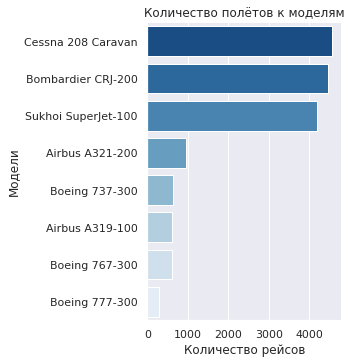

In [7]:
sns.set()

ax = sns.catplot(x="flights_amount", y="model", kind='bar',palette='Blues_r',\
                 data=model_df.sort_values(by='flights_amount', ascending = False))
ax.set(title = "Количество полётов к моделям", ylabel='Модели', xlabel='Количество рейсов')            


#plt.show()


### Выводы
По данному графику видно, что в сентябре 2018-го года больше всего рейса совершили малые/ближнемагистральные самолеты.

Это довольно "странный" результат, который мог быть получен по следующим причинам:

1) Ошибки загрузки данных в СУБД из-за чего показатели по моделям Большой двойки оказались занижены

2) Модели малой вместимости летают чаще из-за малого расстояния и, соответственно, делают больше рейсов за тот же промежуток времени

***Следует обратиться за дополнительными сведениям в системы популярных аэропортов и перепроверить данные***


In [8]:
cities_df.describe().T

,count,mean,std,min,25%,50%,75%,max
average_flights,101.0,5.494189,13.11979,1.0,2.0,3.0,5.870968,129.774194


Максимальное среднее количество рейсов в день превышает 129 единиц, минимальное - 1

50% городов из выборки по данным имеют показатели в 3 рейса в день, 75% - почти 6 рейсов в день.

Среднее оказалось смещено в сторону 75% перцентиля, соответственно, имеет серьезное смещение в данных в сторону лидеров.

Примечательно, что как минимум 1 рейс связывает город из выборки и другие города

График для 101 города будет достаточно расплывчат, поэтому будет построен график по топу-10 популярных направлений

**Отберем топ-10 городов по количеству полётов:**

In [9]:
top10 = cities_df.sort_values(by='average_flights', ascending=False)[:10]

top10

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


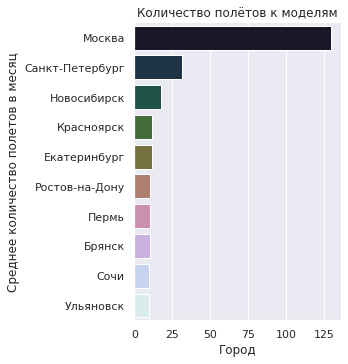

In [10]:
sns.set()

ax = sns.catplot( x="average_flights",y="city", kind='bar',palette='cubehelix',data=top10)
ax.set(title = "Количество полётов к моделям", ylabel='Среднее количество полетов в месяц', xlabel='Город')            


#plt.show()

### Выводы

Как и предполагалось, Москва остается главным транспортным узлом России, соответственно, она имеет серьезный отрыв (почти в 100 единиц по отношению к Санкт-Петербургу, который расположился на втором месте)

На последующих позициях расположились города миллионики за Уралом (Новосибирск, Красноярск, Екатеринбург), которые также являются в своих регионах основными транспортными узлами и целям деловых поездок, а также передвижений внутри этих регионов.

На 6-м месте города из Центральной и Южной России.

Сочи является туристическим центром, соответственно, он тоже имеет хорошие показатели ежедневных рейсов.



# <a id='hypo'>2. Проверка гипотезы</a>

In [11]:
fest_df = pd.read_csv('/datasets/query_last.csv')

fest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


Заполним пропущенные значения наличия фестиваля в городе Москве, чтобы провести статистическое тестирование

In [12]:
fest_df['festival'] = fest_df['festival_week'].apply(lambda x: 1 if x > 0 else 0)
fest_df

,week_number,ticket_amount,festival_week,festival_name,festival
0,30,43568,30.0,Park Live,1
1,31,51034,31.0,Пикник Афиши,1
2,32,51675,NaN,NaN,0
3,33,51378,NaN,NaN,0
4,34,51492,NaN,NaN,0
5,35,51360,NaN,NaN,0
6,36,51386,36.0,Видфест,1
7,37,51670,NaN,NaN,0
8,38,51518,NaN,NaN,0
9,39,51623,NaN,NaN,0


## <a id='amount_graph'> Продажи билетов в зависимости от фестиваля</a>

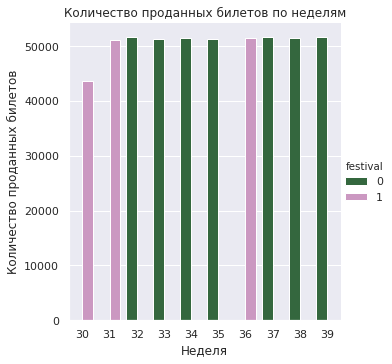

In [13]:
sns.set()

ax = sns.catplot( x="week_number",y="ticket_amount", kind='bar',hue = 'festival',palette='cubehelix',data=fest_df)
ax.set(title = "Количество проданных билетов по неделям", ylabel='Количество проданных билетов', xlabel='Неделя')            




## <a id='city'> Статистическая оценка популярности</a>

In [14]:
sample_1 = fest_df.query('festival == 1')['ticket_amount']
sample_2 = fest_df.query('festival == 0')['ticket_amount']


var_1 = np.var(sample_1)
var_2 = np.var(sample_2)

print(f'''Дисперсия продаж в месяцах с фестивалем: {var_1}
Дисперсия продаж в месяцах без фестиваля: {var_2}
Отношение между дисперсиями: {var_1/var_2}''')

Дисперсия продаж в месяцах с фестивалем: 12998464.888888888
Дисперсия продаж в месяцах без фестиваля: 14694.408163265309
Отношение между дисперсиями: 884.5858060063878


**Дисперсии серьезно отличаются, однако это могло быть вызвано малой базой выборок**

<div style="border:solid green 2px; padding: 20px"> <b>Отличная работа</b><br>
Молодец, что проверил👌</div> <br>

In [15]:
smart_mean = np.mean(sample_1)
ultra_mean = np.mean(sample_2)

print('''Средние месячные продажи в месяцах с фестивалем: {}
Средние месячные продажи в месяцах без фестиваля: {}'''.format(smart_mean, ultra_mean))

Средние месячные продажи в месяцах с фестивалем: 48662.666666666664
Средние месячные продажи в месяцах без фестиваля: 51530.857142857145


**Средние также отличаются, причем не в сторону фестивалей**

## <a id='test'>Тестирование</a>

Сформулируем гипотезу о равенстве средних двух генеральных совокупностей и проверим её с помощью статистического теста **t-критерия Стьюдента**:

* H0: Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время
* H1: Средний спрос на билеты во время фестивалей и в обычное время отличается

Уровень значимости - 0.05, дисперсии не считаем равными

<div style="border:solid green 2px; padding: 20px"> <b>Отличная работа 2</b><br>👍Гипотезы сформулированы верно</div> 

<div style="border:solid red 2px; padding: 20px"> <b>Что необходимо доработать</b><br>
Кажется, что гипотезы сфомулированы не для этого проекта😁</div> <br>

In [16]:
from scipy import stats as st

alpha = .05

results = st.ttest_ind(
    sample_1, 
    sample_2, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha :
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.377432493172683
Не получилось отвергнуть нулевую гипотезу


Таким образом, получили, что с 95% вероятностью различия среднего спроса на билеты в месяцах с фестивалем и без фестиваля – не отличаются. 

**Таким образом, мы не можем отвергуть нулевую о равенстве среднего спроса**

Для бизнеса это означает, что при планировании направлений не следует опираться на такой фактор популярности как наличие фестивалей.

Однако данные требуют уточнения для городов с малым постоянным количеством рейсов и продажами билетов при проведении в них фестивалей

# <a id='summary'>Выводы</a>

По данным из БД, нами были получены следующие сведения:

1) На рынке большое количество рейсов совершаются самолетами малой дальности. Они берут количеством рейсов, однако предполагается, что самолеты Airbus, Boeing перевозят большое количество пассажиров за рейс. 

**Соответственно, требуется уточнить данные по пассажирообороту для каждой из моделей**

2) Москва - безусловный лидер по количеству рейсов, Санкт-Петербург на втором месте. Города-миллионики остаются главными транспортными узлами для своих регионов. Сочи - также имеет хорошие показатели популярности.

**Однако в большинстве своем на выборке из 100 городов: 50% городов из выборки по данным имеют показатели в 3 рейса в день, 75% - почти 6 рейсов в день**

3) Оценка продаж билетов в разбивке по месяцам значимо не зависит от наличия фестиваля в изучаемом месяце или нет. 

**Данные получены для города Москвы, где всегда большой и постоянный спрос. Требуются данные для менее популярных направлений для планирования рейсов на их направлениях.**


[<center>В начало</center>](#start)